In [1]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
import numpy as np
from PIL import Image

# Load images
actual_mask = np.array(Image.open("N:\\My Drive\\Data\\ActualMasks\\actual_20.png"))
predicted_mask = np.array(Image.open("N:\\My Drive\\Data\\Predictions\\prediction_20.png"))

# Ensure the masks are in categorical format if they are not
# For example, if your masks are in class indices (0 to 3):
# actual_mask = (actual_mask == np.arange(4)[:, None, None]).astype(int)
# predicted_mask = (predicted_mask == np.arange(4)[:, None, None]).astype(int)

# Metrics calculation
metrics = {
    "Accuracy Score": accuracy_score(actual_mask.flatten(), predicted_mask.flatten()),
    "F1 Score": f1_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro'),  # Use average='macro' for imbalanced classes
    "Jaccard Score": jaccard_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro'),
    "Precision Score": precision_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro'),
    "Recall Score": recall_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro')
}

print(metrics)


{'Accuracy Score': 0.9837493896484375, 'F1 Score': 0.6534441466549122, 'Jaccard Score': 0.6408751678937826, 'Precision Score': 0.6607780348414972, 'Recall Score': 0.646754343483689}


c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
import numpy as np
from PIL import Image
import os

# Define directories
actual_dir = "N:\\My Drive\\Data\\ActualMasks"
predicted_dir = 'N:\\My Drive\\Data\\Predictions'

In [21]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
import numpy as np
from PIL import Image
import os

# Define directories
actual_dir = "N:\\My Drive\\Data\\ActualMasks"
predicted_dir = 'N:\\My Drive\\Data\\Predictions'

# Initialize lists to store scores
accuracies = []
f1_scores = []
jaccard_scores = []
precisions = []
recalls = []
missing_files = []

# Iterate over actual masks
for filename in os.listdir(actual_dir):
    actual_path = os.path.join(actual_dir, filename)
    predicted_filename = filename.replace('actual_', 'prediction_')  # Adjusted to match prediction filenames
    predicted_path = os.path.join(predicted_dir, predicted_filename)
    
    # Check if the predicted file exists
    if not os.path.exists(predicted_path):
        missing_files.append(filename)
        continue
    
    # Load masks
    actual_mask = np.array(Image.open(actual_path))
    predicted_mask = np.array(Image.open(predicted_path))

    # Compute metrics for each image
    accuracies.append(accuracy_score(actual_mask.flatten(), predicted_mask.flatten()))
    f1_scores.append(f1_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro', zero_division=1))
    jaccard_scores.append(jaccard_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro'))
    precisions.append(precision_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro', zero_division=1))
    recalls.append(recall_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro'))

# Calculate average scores
average_metrics = {
    "Average Accuracy Score": np.mean(accuracies),
    "Average F1 Score": np.mean(f1_scores),
    "Average Jaccard Score": np.mean(jaccard_scores),
    "Average Precision Score": np.mean(precisions),
    "Average Recall Score": np.mean(recalls)
}

# Output results
print(average_metrics)
if missing_files:
    print("Missing predicted files for the following actual masks:", missing_files)


c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Musae\AppData\Local

{'Average Accuracy Score': 0.9746871590614319, 'Average F1 Score': 0.8271213627052977, 'Average Jaccard Score': 0.7877927002714582, 'Average Precision Score': 0.9208912079876994, 'Average Recall Score': 0.8111405522731121}


In [3]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score
import numpy as np
from PIL import Image
import os

# Define directories
actual_dir = "N:\\My Drive\\Data\\ActualMasks"
predicted_dir = 'N:\\My Drive\\Data\\Predictions'

# Initialize lists to store scores
accuracies = []
f1_scores = []
jaccard_scores = []
precisions = []
recalls = []
missing_files = []

# Iterate over actual masks
for filename in os.listdir(actual_dir):
    actual_path = os.path.join(actual_dir, filename)
    predicted_filename = filename.replace('actual_', 'prediction_')  # Adjusted to match prediction filenames
    predicted_path = os.path.join(predicted_dir, predicted_filename)
    
    # Check if the predicted file exists
    if not os.path.exists(predicted_path):
        missing_files.append(filename)
        continue
    
    # Load masks
    actual_mask = np.array(Image.open(actual_path))
    predicted_mask = np.array(Image.open(predicted_path))

    # Compute metrics for each image
    accuracies.append(accuracy_score(actual_mask.flatten(), predicted_mask.flatten()))
    f1_scores.append(f1_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro', zero_division=1))
    jaccard_scores.append(jaccard_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro'))
    precisions.append(precision_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro', zero_division=1))
    recalls.append(recall_score(actual_mask.flatten(), predicted_mask.flatten(), average='macro', zero_division=0))

# Calculate average scores
average_metrics = {
    "Average Accuracy Score": np.mean(accuracies),
    "Average F1 Score": np.mean(f1_scores),
    "Average Jaccard Score": np.mean(jaccard_scores),
    "Average Precision Score": np.mean(precisions),
    "Average Recall Score": np.mean(recalls)
}

# Output results
print(average_metrics)
if missing_files:
    print("Missing predicted files for the following actual masks:", missing_files)


{'Average Accuracy Score': 0.9746871590614319, 'Average F1 Score': 0.8271213627052977, 'Average Jaccard Score': 0.7877927002714582, 'Average Precision Score': 0.9208912079876994, 'Average Recall Score': 0.8111405522731121}


In [4]:
import numpy as np
import matplotlib.pyplot as plt

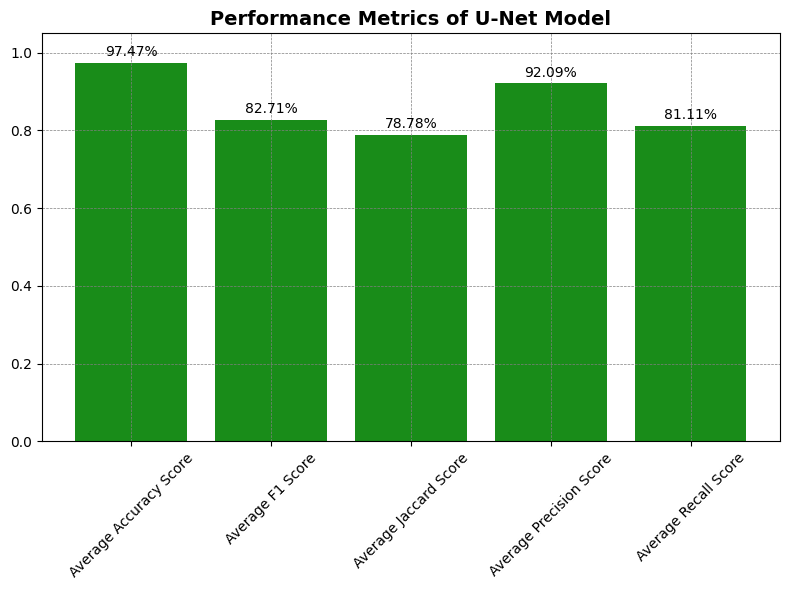

In [13]:
# Names of metrics
metrics_names = list(average_metrics.keys())
# Values of metrics
metrics_values = list(average_metrics.values())
# Create a bar plot
# Create a bar plot with enhanced visuals
# Create a bar plot with enhanced visuals
plt.figure(figsize=(8, 6))  # Adjust size to better fit labels
bars = plt.bar(metrics_names, metrics_values, color='green', alpha=0.9)  # Choose a professional color with slight transparency

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{round(yval*100, 2)}%', ha='center', va='bottom')  # Display as percentage

# Styling improvements
#plt.xlabel('Performance Metrics', fontsize=12, fontweight='bold')  # Bold font for x-axis label
#plt.ylabel('Scores', fontsize=12, fontweight='bold')  # Bold font for y-axis label
plt.title('Performance Metrics of U-Net Model', fontsize=14, fontweight='bold')  # Bold and larger font for title
plt.ylim(0, 1.05)  # Slightly increase y-limit to fit labels
plt.xticks(fontsize=10, rotation=45)  # Increase font size and rotate labels for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Use a subtler grid color
plt.tight_layout()  # Ensure everything fits without overlap

# Show the plot
plt.show()


In [7]:
for pred_path, true_path in tqdm(zip(pred_mask_files, true_mask_files), total=len(pred_mask_files)):
    print(f"Comparing: {os.path.basename(pred_path)} with {os.path.basename(true_path)}")
    # Rest of your code for processing and metrics calculation...


100%|██████████| 6/6 [00:00<00:00, 6000.43it/s]

Comparing: prediction_0.png with actual_22.png
Comparing: prediction_1.png with actual_23.png
Comparing: prediction_2.png with actual_24.png
Comparing: prediction_3.png with actual_25.png
Comparing: prediction_4.png with actual_26.png
Comparing: prediction_5.png with actual_27.png


In [8]:
print(np.unique(true_mask, return_counts=True))
print(np.unique(pred_mask, return_counts=True))


(array([  0, 128, 255], dtype=uint8), array([63020,  2502,    14], dtype=int64))
(array([  0, 128, 255], dtype=uint8), array([65272,   263,     1], dtype=int64))


In [10]:
import numpy as np
your_actual_path = "N:\\My Drive\\Data\\ActualMasks"
# Assuming true_mask is your actual mask loaded properly
true_mask = load_and_preprocess_mask(your_actual_path)  # Load a correct mask

# Create a completely random prediction mask
random_pred_mask = np.random.randint(0, 4, size=true_mask.size)  # Assuming 4 classes

# Calculate metrics
acc = accuracy_score(true_mask, random_pred_mask)
f1 = f1_score(true_mask, random_pred_mask, average='weighted', zero_division=0)
jac = jaccard_score(true_mask, random_pred_mask, average='weighted', zero_division=0)
recall = recall_score(true_mask, random_pred_mask, average='weighted', zero_division=0)
precision = precision_score(true_mask, random_pred_mask, average='weighted', zero_division=0)

print(f"Random Test - Accuracy: {acc:.5f}, F1 Score: {f1:.5f}, Jaccard: {jac:.5f}, Recall: {recall:.5f}, Precision: {precision:.5f}")


FileNotFoundError: Mask file not found: N:\My Drive\Data\ActualMasks